In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import glob
import os
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

In [45]:
TARGET_CAGR = 0.062  
TARGET_SHARPE = 0.36
MIN_STOCKS = 20
MAX_WEIGHT = 0.20
MIN_WEIGHT = 0.01
REBALANCE_FREQ = 'Q'  
# Загрузка всех CSV файлов
price_files = glob.glob("data/*.csv")
prices_dict = {}

for file in price_files:
    ticker = os.path.basename(file).replace('.csv', '')
    df = pd.read_csv(file, parse_dates=['Date'])
    df['ticker'] = ticker
    prices_dict[ticker] = df

# Собираем все данные в один DataFrame
all_prices = pd.concat(prices_dict.values())
all_prices = all_prices.sort_values(['ticker', 'Date']).reset_index(drop=True)
all_prices = all_prices.rename(columns={'Close': 'price'})


In [46]:
def prepare_data(all_prices):
    
    start_date = '1999-01-01'
    end_date = '2020-05-31'
    data = all_prices[(all_prices['Date'] >= start_date) & 
                      (all_prices['Date'] <= end_date)].copy()
    
    prices_wide = data.pivot(index='Date', columns='ticker', values='price')
    

    min_trading_days = 252  
    prices_wide = prices_wide.dropna(axis=1, thresh=min_trading_days)
    
    prices_wide = prices_wide.interpolate(method='linear', limit=5)
    
    
    return prices_wide

prices_wide = prepare_data(all_prices)
prices_wide

ticker,ABC,ABCP,ABMD,ACY,AEP,AGHC,AJG,ALB,ALL,AMAG,AMSC,AMTD,AMWD,ANIK,ANSS,ARGO,ASGN,ATNI,ATRO,AVA,AVT,AWRE,AZO,BA,BASI,BBQ,BBY,BGG,BKE,BKSC,BLL,BRO,BUSE,BZH,CACC,CAKE,CASI,CASS,CDE,CDR,CENT,CERS,CFFI,CHDN,CHS,CIA,CIEN,CIX,CLAR,CLRO,CMA,CMS,COLM,COST,CPF,CREE,CRS,CSPI,CTAS,CTO,CTXS,CVBF,CVTI,CZNC,DCI,DCO,DECK,DHI,DHR,DJCO,DORM,DOV,DVA,EA,EAT,EBF,EBIX,ECL,EE,EFX,EGHT,EHC,EL,ELGX,ELLO,ELSE,EML,EMR,ENZ,EQC,EQS,EQT,ESMC,EV,EVI,EVOL,EXC,EXPD,EXPO,FEIM,FHN,FLIC,FLIR,FWRD,GBCI,GEL,GFED,GHM,GIS,GL,GNSS,GNTX,GOGL,GPI,GTY,HAIN,HEI,HFC,HIG,HNRG,HON,HRTX,HSIC,HSKA,HTLD,HZO,ICCC,ICON,IDXG,IDXX,IEHC,IEP,IMGN,INTU,INTZ,IRIX,ITT,KEX,KWR,LAD,LDL,LHX,LM,LMT,LNDC,LNN,LPTH,LPX,LSI,LTC,LUB,LUV,MAN,MATW,MATX,MBI,MBOT,MCF,MCO,MDC,MIND,MKC,MOV,MRO,MSFT,MSM,MSON,MTD,MU,NAII,NANX,NAT,NC,NICK,NJR,NOBH,NOC,NOV,NSEC,NTRS,NWFL,NWIN,NWN,NYMX,O,OCN,OFG,OFIX,OI,OII,OKE,OLED,OLP,OPY,OSK,PAA,PCG,PCYN,PDEX,PDLI,PEI,PLCE,PLT,PLX,PMD,POWI,PRCP,PROV,PWOD,RAMP,RBA,RDN,RDNT,RE,RELL,RGLD,RGS,RICK,RNR,ROYL,RPM,RRC,RTX,SAH,SANM,SBGI,SCCO,SCL,SEAC,SEE,SEIC,SENEA,SF,SFE,SGA,SHOO,SIEB,SIRI,SIVB,SKYW,SLP,SMP,SOFO,SPPI,STAR,STBA,STFC,STRM,STRS,STT,SUI,SUP,SWN,SYK,TCF,TDS,TELL,TER,THG,THRM,TK,TLGT,TNC,TOFB,TPL,TRV,TRXC,TTEK,TUP,UBA,UBCP,UDR,UFPI,UFPT,UHAL,UHT,UIS,UNFI,UTL,UVV,VASO,VOLT,VXRT,WAB,WAT,WGO,WHR,WPC,WRE,WSTG,WTM,WTRG,WVFC,WVVI,WWD,WYY,XLNX,YRCW,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-04,7.092693,0.866832,4.437500,8.5000,17.489355,29.2500,5.318437,8.197353,23.180416,7.1875,105.625,3.367893,14.819009,5.062500,2.734375,17.397696,16.625000,1.916460,0.756286,8.836157,24.345272,11.747721,32.937500,20.820690,4.000,2.8750,9.644780,13.762630,3.226315,3.742781,2.273678,1.711107,17.785721,39.947865,7.500000,7.209869,237.8750,3.680882,49.375,43.734303,4.824986,20.5000,8.654939,8.870962,0.936034,3.526182,50.093750,13.588309,3.958342,3.606971,33.773285,24.048985,4.854892,25.242479,105.809280,11.312500,8.075089,4.398406,35.302673,9.423357,18.098278,2.830126,17.9375,8.090731,3.783458,13.289147,0.666667,4.572332,6.463123,36.750000,1.913520,15.945982,9.333333,12.608199,8.408475,3.380774,6.979351,13.718072,6.795192,16.093573,5.68750,68.211510,16.457172,35.0000,24.327957,0.946581,6.493279,16.227045,8.535538,8.988067,4.177047,2.835414,2.3125,3.016184,1.374463,3.897502,9.112922,4.145788,0.682460,8.371327,20.236660,3.409105,2.499946,3.576221,3.734364,2.371449,7.081426,1.232401,10.076614,13.033828,4.299273,3.777481,13.527599,21.095903,3.176542,11.562500,4.192966,0.496859,34.692574,0.550391,25.347242,400.000000,8.799020,41.301357,3.149562,8.000000,1.25000,37.8125,2650.00,6.843750,0.240741,3.969284,2.0000,11.249561,13.50,4.1250,4.934545,9.812500,9.132823,13.816548,12.125,10.056688,14.851307,23.172602,6.0000,11.887414,39.50,13.501391,7.169547,3.941903,13.850250,9.307199,17.344311,12.538589,5.797452,37.488201,23793.75,0.088453,8.168634,5.903650,4.7500,5.339791,9.775150,5.134886,22.440626,13.466373,5.93750,26.750000,24.968750,11.0000,2.18750,1.004751,4.006155,0.859026,3.939552,9.456366,17.439236,4.454536,4.784660,28.418751,4.138389,8.332867,11.064725,5.000000,3.363342,103.707283,10.435340,13.250000,30.321423,3.011065,2.953855,4.211737,1.989962,11.118941,4.483634,1.833248,17.408913,0.250,4.687500,1.118338,3.688849,24.056545,24.323175,187.50,7.397201,5.581805,6.720619,5.119311,9.493675,28.297272,3.146500,20.452242,0.220000,25.932714,5.589264,2.898895,22.726742,0.964381,8.634941,1.617548,7.338113,2.236582,10.889064,13.857599,92.250000,8.835916,0.579644,8.414948,4.041667,18.823351,6.607315,12.000000,2.129319,52.889996,29.918510,0.922638,7.259451,33.862446,8.625000,13.628460,0.197228,14.296991,50.000,277.496674,23.725815,13.750829,8.128292,1.3750,7.231664,25.213879,8.163692,15.083407,0.861135,11.217297,9.016494,14.804343,10.7

In [47]:
# Класс для расчета факторов отбора акций
class FactorCalculator:
    
    @staticmethod
    def calculate_momentum(prices, lookback=252):
        momentum = prices.pct_change(periods=lookback, fill_method=None)
        return momentum
    
    @staticmethod
    def calculate_volatility(prices, window=63):
        returns = prices.pct_change(fill_method=None)
        volatility = returns.rolling(window=window).std()
        return volatility
    
    @staticmethod
    def calculate_trend_strength(prices, short_window=50, long_window=200):
        sma_short = prices.rolling(window=short_window).mean()
        sma_long = prices.rolling(window=long_window).mean()
        trend = (sma_short / sma_long) - 1  
        return trend
    
    @staticmethod
    def calculate_relative_strength(prices, window=126):
        
        returns = prices.pct_change(window, fill_method=None)
        median_returns = returns.median(axis=1)  
        relative_strength = returns.sub(median_returns, axis=0)
        return relative_strength

momentum = FactorCalculator.calculate_momentum(prices_wide)
volatility = FactorCalculator.calculate_volatility(prices_wide)
trend = FactorCalculator.calculate_trend_strength(prices_wide)
relative_strength = FactorCalculator.calculate_relative_strength(prices_wide)


In [48]:
# Композитная модель отбора акций
class StockRanker:
    
    def __init__(self, min_stocks=20):
        self.min_stocks = min_stocks
    
    def calculate_composite_score(self, factors_df):
        
        # Нормализация факторов 
        normalized_factors = factors_df.copy()
        
        for factor in ['momentum', 'relative_strength', 'trend']:
            normalized_factors[factor] = normalized_factors[factor].rank(pct=True)
        
        # Для волатильности чем ниже, тем лучше
        normalized_factors['volatility'] = 1 - normalized_factors['volatility'].rank(pct=True)
        
        # Композитный скор (взвешенная сумма)
        weights = {
            'momentum': 0.35,           # Самый важный фактор
            'volatility': 0.25,         # Управление риском
            'trend': 0.20,              # Технический тренд
            'relative_strength': 0.20   # Относительная эффективность
        }
        
        composite_score = (
            normalized_factors['momentum'] * weights['momentum'] +
            normalized_factors['volatility'] * weights['volatility'] +
            normalized_factors['trend'] * weights['trend'] +
            normalized_factors['relative_strength'] * weights['relative_strength']
        )
        
        return composite_score
    
    def rank_stocks(self, momentum_data, volatility_data, trend_data, 
                   relative_strength_data, date):
        
        try:
            # Собираем все факторы в один DataFrame
            factors_df = pd.DataFrame({
                'momentum': momentum_data.loc[date],
                'volatility': volatility_data.loc[date],
                'trend': trend_data.loc[date],
                'relative_strength': relative_strength_data.loc[date]
            }).dropna()
            
            if len(factors_df) < self.min_stocks:
                return None
            
            # Расчет композитного скора
            factors_df['composite_score'] = self.calculate_composite_score(factors_df)
            
            # Ранжирование
            ranked_stocks = factors_df.sort_values('composite_score', ascending=False)
            
            return ranked_stocks
            
        except Exception as e:
            print(f" Ошибка  на {date}: {e}")
            return None


stock_ranker = StockRanker(min_stocks=MIN_STOCKS)



In [49]:
# Система ребалансировки портфеля
class PortfolioRebalancer:
    
    def __init__(self, rebalance_freq='Q'):
        self.rebalance_freq = rebalance_freq
    
    def generate_rebalance_dates(self, prices_index):
        
        # Квартальные даты (январь, апрель, июль, октябрь)
        all_dates = pd.date_range(start=prices_index.min(), 
                                 end=prices_index.max(), freq='Q')
        
        # Фильтрация только рабочих дней
        rebalance_dates = []
        for date in all_dates:
            # Ищем ближайший торговый день
            future_dates = prices_index[prices_index >= date]
            if len(future_dates) > 0:
                rebalance_dates.append(future_dates[0])
        
        return sorted(set(rebalance_dates))
    
    def smart_rebalance(self, date, prices, momentum, volatility, trend, relative_strength):
        
        # Пробуем текущую дату
        ranked_stocks = stock_ranker.rank_stocks(
            momentum, volatility, trend, relative_strength, date
        )
        
        if ranked_stocks is not None:
            weights = weight_optimizer.calculate_weights(ranked_stocks)
            if weights is not None:
                return weights
        
        # Если не получилось, ищем в ближайшие РАБОЧИЕ дни
        current_idx = prices.index.get_indexer([date], method='pad')[0]
        
        for days_forward in range(1, 11):  # Пробуем 10 рабочих дней вперед
            test_idx = current_idx + days_forward
            if test_idx >= len(prices.index):
                break
                
            test_date = prices.index[test_idx]
            ranked_stocks = stock_ranker.rank_stocks(
                momentum, volatility, trend, relative_strength, test_date
            )
            
            if ranked_stocks is not None:
                weights = weight_optimizer.calculate_weights(ranked_stocks)
                if weights is not None:
                    print(f" Ребалансировка смещена: {date.date()} → {test_date.date()}")
                    return weights
        
        print(f"  Ребалансировка пропущена: {date.date()} (не найдено данных в +10 дней)")
        return None

# Инициализация системы ребалансировки
rebalancer = PortfolioRebalancer(rebalance_freq=REBALANCE_FREQ)

# ПРОВЕРКА СИСТЕМЫ РЕБАЛАНСИРОВКИ

# 1. Проверяем генерацию дат ребалансировки
rebalance_dates = rebalancer.generate_rebalance_dates(prices_wide.index)
print(f" Сгенерировано дат ребалансировки: {len(rebalance_dates)}")
print(f"• Первая дата: {rebalance_dates[0].date()}")
print(f"• Последняя дата: {rebalance_dates[-1].date()}")

first_successful_date = None
for date in rebalance_dates:
    # Пропускаем слишком ранние даты (нужна история для расчета факторов)
    if date < prices_wide.index[252]:  # Нужно минимум 1 год данных
        continue
        
    weights = rebalancer.smart_rebalance(
        date, prices_wide, momentum, volatility, trend, relative_strength
    )
    
    if weights is not None:
        first_successful_date = date
        break

if first_successful_date is not None:
    print(f" Первая успешная дата ребалансировки: {first_successful_date.date()}")
    
    # Тестируем на этой и следующих датах
    test_dates = [first_successful_date]
    next_dates = [d for d in rebalance_dates if d > first_successful_date][:2]  # Следующие 2 даты
    test_dates.extend(next_dates)
    
    print(f"\n ТЕСТИРУЕМ smart_rebalance НА {len(test_dates)} ДАТАХ:")
    print("=" * 60)
    
    for i, date in enumerate(test_dates, 1):
        print(f"\n ТЕСТ {i}: {date.date()}")
        print("-" * 40)
        
        weights = rebalancer.smart_rebalance(
            date, prices_wide, momentum, volatility, trend, relative_strength
        )
        
        if weights is not None:
            print(f" Успешная ребалансировка!")
            print(f"• Получено акций: {len(weights)}")
            print(f"• Сумма весов: {weights.sum():.3f}")
            print(f"• Максимальный вес: {weights.max():.3f}")
            print(f"• Минимальный вес: {weights.min():.3f}")
            
            # Показываем топ-5 акций по весу
            top_5_weights = weights.sort_values(ascending=False).head(5)
            print(f"• Топ-5 акций по весу:")
            for ticker, weight in top_5_weights.items():
                print(f"  {ticker}: {weight:.3f} ({weight*100:.1f}%)")
        else:
            print(f" Ребалансировка не удалась")


 Сгенерировано дат ребалансировки: 85
• Первая дата: 1999-03-31
• Последняя дата: 2020-03-31
 Первая успешная дата ребалансировки: 2000-03-31

 ТЕСТИРУЕМ smart_rebalance НА 3 ДАТАХ:

 ТЕСТ 1: 2000-03-31
----------------------------------------
 Успешная ребалансировка!
• Получено акций: 30
• Сумма весов: 1.000
• Максимальный вес: 0.037
• Минимальный вес: 0.031
• Топ-5 акций по весу:
  SEAC: 0.037 (3.7%)
  EV: 0.036 (3.6%)
  PLT: 0.036 (3.6%)
  AGHC: 0.036 (3.6%)
  CLAR: 0.035 (3.5%)

 ТЕСТ 2: 2000-06-30
----------------------------------------
 Успешная ребалансировка!
• Получено акций: 30
• Сумма весов: 1.000
• Максимальный вес: 0.041
• Минимальный вес: 0.029
• Топ-5 акций по весу:
  NAT: 0.041 (4.1%)
  TK: 0.041 (4.1%)
  BRO: 0.039 (3.9%)
  EQT: 0.039 (3.9%)
  PCYN: 0.037 (3.7%)

 ТЕСТ 3: 2000-10-02
----------------------------------------
 Успешная ребалансировка!
• Получено акций: 30
• Сумма весов: 1.000
• Максимальный вес: 0.041
• Минимальный вес: 0.029
• Топ-5 акций по весу:
  NA

In [50]:
# Симулятор портфел
class PortfolioSimulator:
    
    def __init__(self, initial_capital=1.0):
        self.initial_capital = initial_capital
    
    def run_simulation(self, prices, momentum, volatility, trend, relative_strength):
        
        print(" Запуск симуляции портфеля...")
        
        # Генерация дат ребалансировки
        rebalance_dates = rebalancer.generate_rebalance_dates(prices.index)
        print(f"• Дат ребалансировки: {len(rebalance_dates)}")
        
        # Инициализация переменных трекинга
        portfolio_values = pd.Series(index=prices.index, dtype=float)
        portfolio_values.iloc[0] = self.initial_capital
        
        current_weights = None
        weights_history = pd.DataFrame(index=prices.index, columns=prices.columns)
        transactions_log = []
        
        # Минимальная дата с достаточными данными
        min_data_date = prices.index[252]  # Через 1 год данных
        
        successful_rebalances = 0
        rebalance_attempts = 0
        
        # Основной цикл по торговым дням
        for i in range(1, len(prices)):
            current_date = prices.index[i]
            prev_date = prices.index[i-1]
            
            # Ребалансировка в запланированные даты (после минимальной даты)
            if current_date in rebalance_dates and current_date >= min_data_date:
                rebalance_attempts += 1
                new_weights = rebalancer.smart_rebalance(
                    current_date, prices, momentum, volatility, trend, relative_strength
                )
                
                if new_weights is not None:
                    # Логирование смены весов
                    if current_weights is not None:
                        changed_count = len(new_weights)
                        transactions_log.append({
                            'date': current_date,
                            'type': 'REBALANCE',
                            'stocks_count': changed_count
                        })
                    
                    current_weights = new_weights
                    successful_rebalances += 1
                    print(f"✅ Успешная ребалансировка {current_date.date()}: {len(new_weights)} акций")
            
            # Расчет дневной доходности портфеля
            if current_weights is not None:
                # Сохраняем веса
                weights_history.loc[current_date] = 0
                weights_history.loc[current_date, current_weights.index] = current_weights
                
                # Доходности за день
                daily_returns = prices.loc[current_date] / prices.loc[prev_date] - 1
                
                # Доходность портфеля (взвешенная)
                valid_returns = daily_returns.reindex(current_weights.index).fillna(0)
                portfolio_return = (current_weights * valid_returns).sum()
                
                # Обновление стоимости портфеля
                portfolio_values.loc[current_date] = (
                    portfolio_values.loc[prev_date] * (1 + portfolio_return)
                )
            else:
                # Если весов нет, сохраняем предыдущее значение
                portfolio_values.loc[current_date] = portfolio_values.loc[prev_date]
        
        # Заполнение пропусков
        portfolio_values = portfolio_values.ffill()
        weights_history = weights_history.ffill()
        
        
        return portfolio_values, weights_history, transactions_log

# Запуск симуляции
simulator = PortfolioSimulator(initial_capital=1.0)
portfolio_values, weights_history, transactions_log = simulator.run_simulation(
    prices_wide, momentum, volatility, trend, relative_strength
)

 Запуск симуляции портфеля...
• Дат ребалансировки: 85
✅ Успешная ребалансировка 2000-03-31: 30 акций
✅ Успешная ребалансировка 2000-06-30: 30 акций
✅ Успешная ребалансировка 2000-10-02: 30 акций
✅ Успешная ребалансировка 2001-01-02: 30 акций
✅ Успешная ребалансировка 2001-04-02: 30 акций
✅ Успешная ребалансировка 2001-07-02: 30 акций
✅ Успешная ребалансировка 2001-10-01: 30 акций
✅ Успешная ребалансировка 2001-12-31: 30 акций
✅ Успешная ребалансировка 2002-04-01: 30 акций
✅ Успешная ребалансировка 2002-07-01: 30 акций
✅ Успешная ребалансировка 2002-09-30: 30 акций
✅ Успешная ребалансировка 2002-12-31: 30 акций
✅ Успешная ребалансировка 2003-03-31: 30 акций
✅ Успешная ребалансировка 2003-06-30: 30 акций
✅ Успешная ребалансировка 2003-09-30: 30 акций
✅ Успешная ребалансировка 2003-12-31: 30 акций
✅ Успешная ребалансировка 2004-03-31: 30 акций
✅ Успешная ребалансировка 2004-06-30: 30 акций
✅ Успешная ребалансировка 2004-09-30: 30 акций
✅ Успешная ребалансировка 2004-12-31: 30 акций
✅ Усп

In [51]:
# Анализ эффективности инвестиционного портфеля
class PerformanceAnalyzer:
    
    def __init__(self, risk_free_rate=None):
        self.risk_free_rate = risk_free_rate
    
    def calculate_10y_treasury_rate(self, portfolio_dates):
        # Исторические данные 10-летних 
        treasury_rates = {
            '1999': 0.055, '2000': 0.060, '2001': 0.050, '2002': 0.045, '2003': 0.040,
            '2004': 0.042, '2005': 0.044, '2006': 0.047, '2007': 0.046, '2008': 0.037,
            '2009': 0.034, '2010': 0.033, '2011': 0.028, '2012': 0.018, '2013': 0.026,
            '2014': 0.025, '2015': 0.022, '2016': 0.021, '2017': 0.024, '2018': 0.029,
            '2019': 0.019, '2020': 0.015
        }
        
        # Создаем Series с ставками для каждой даты
        risk_free_series = pd.Series(index=portfolio_dates, dtype=float)
        
        for date in portfolio_dates:
            year = str(date.year)
            if year in treasury_rates:
                risk_free_series[date] = treasury_rates[year]
            else:
                risk_free_series[date] = 0.02  # Значение по умолчанию
        
        return risk_free_series / 252  # Дневная ставка
    
    def calculate_metrics(self, portfolio_values):
        
        # Дневные доходности портфеля
        portfolio_returns = portfolio_values.pct_change().dropna()
        
        # Безрисковая ставка
        risk_free_daily = self.calculate_10y_treasury_rate(portfolio_values.index)
        risk_free_daily = risk_free_daily.reindex(portfolio_returns.index).fillna(0.02/252)
        
        # Избыточная доходность
        excess_returns = portfolio_returns - risk_free_daily
        
        # Основные метрики
        total_return = float(portfolio_values.iloc[-1] / portfolio_values.iloc[0] - 1)
        
        # CAGR
        years = (portfolio_values.index[-1] - portfolio_values.index[0]).days / 365.25
        cagr = float((portfolio_values.iloc[-1] / portfolio_values.iloc[0]) ** (1/years) - 1)
        
        # Волатильность (годовая)
        volatility = float(portfolio_returns.std() * np.sqrt(252))
        
        # Коэффициент Шарпа
        sharpe = float(excess_returns.mean() / portfolio_returns.std() * np.sqrt(252))
        
        # Максимальная просадка
        cumulative_max = portfolio_values.cummax()
        drawdown = (portfolio_values - cumulative_max) / cumulative_max
        max_drawdown = float(drawdown.min())
            
        metrics = {
            'Total Return': total_return,
            'CAGR': cagr,
            'Volatility': volatility,
            'Sharpe Ratio': sharpe,
            'Max Drawdown': max_drawdown,
            'Final Value': float(portfolio_values.iloc[-1]),
            'Period (Years)': float(years)
        }
        
        return metrics, portfolio_returns, drawdown

# Анализ производительности
analyzer = PerformanceAnalyzer()
metrics, portfolio_returns, drawdown = analyzer.calculate_metrics(portfolio_values)

# Проверка достижения целей
print("\n ДОСТИЖЕНИЕ ЦЕЛЕЙ:")
print(f"• CAGR: {metrics['CAGR']:.2%} vs цель {TARGET_CAGR:.2%} - {' ДОСТИГНУТА' if metrics['CAGR'] >= TARGET_CAGR else '❌ НЕ ДОСТИГНУТА'}")
print(f"• Sharpe: {metrics['Sharpe Ratio']:.3f} vs цель {TARGET_SHARPE:.3f} - {' ДОСТИГНУТА' if metrics['Sharpe Ratio'] >= TARGET_SHARPE else '❌ НЕ ДОСТИГНУТА'}")


 ДОСТИЖЕНИЕ ЦЕЛЕЙ:
• CAGR: 11.18% vs цель 6.20% -  ДОСТИГНУТА
• Sharpe: 0.447 vs цель 0.360 -  ДОСТИГНУТА


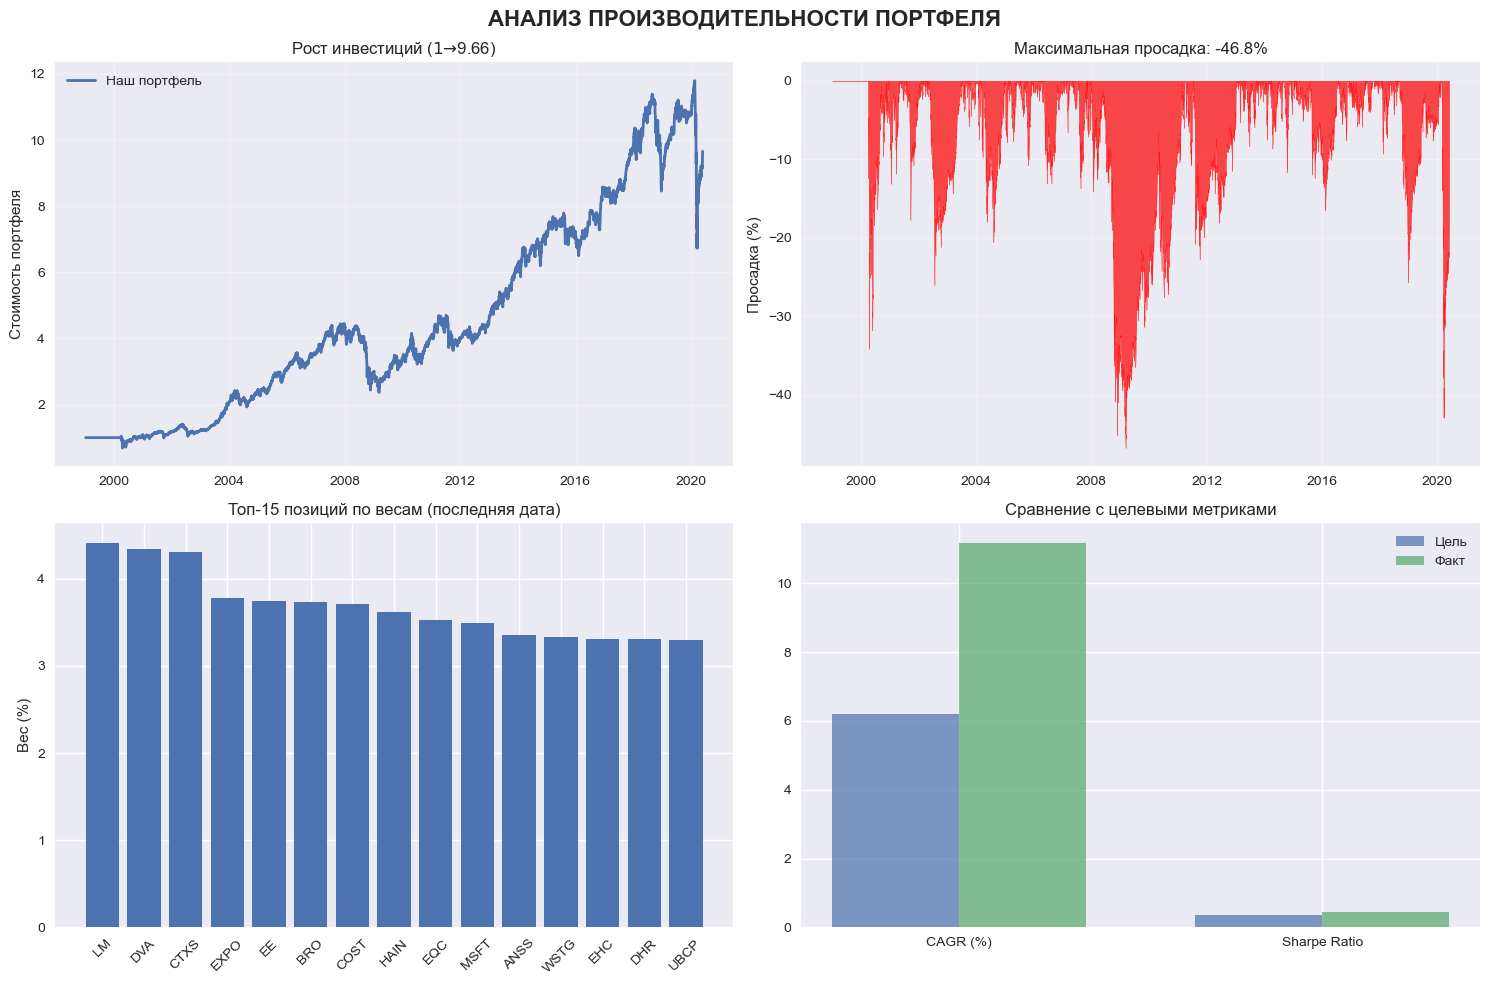

In [52]:
# Визуализация результатов анализа
def create_performance_charts(portfolio_values, drawdown, weights_history, metrics):
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ ПОРТФЕЛЯ', fontsize=16, fontweight='bold')
    
    # 1. Рост портфеля
    axes[0, 0].plot(portfolio_values.index, portfolio_values, linewidth=2, label='Наш портфель')
    axes[0, 0].set_title('Рост инвестиций ($1 → ${:.2f})'.format(portfolio_values.iloc[-1]))
    axes[0, 0].set_ylabel('Стоимость портфеля')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Просадки
    axes[0, 1].fill_between(drawdown.index, drawdown * 100, 0, alpha=0.7, color='red')
    axes[0, 1].set_title('Максимальная просадка: {:.1f}%'.format(metrics['Max Drawdown'] * 100))
    axes[0, 1].set_ylabel('Просадка (%)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Распределение весов (последняя дата)
    latest_weights = weights_history.iloc[-1].dropna()
    latest_weights = latest_weights[latest_weights > 0.001].sort_values(ascending=False)
    
    if len(latest_weights) > 0:
        axes[1, 0].bar(range(len(latest_weights.head(15))), latest_weights.head(15) * 100)
        axes[1, 0].set_title('Топ-15 позиций по весам (последняя дата)')
        axes[1, 0].set_ylabel('Вес (%)')
        axes[1, 0].set_xticks(range(len(latest_weights.head(15))))
        axes[1, 0].set_xticklabels(latest_weights.head(15).index, rotation=45)
    
    # 4. Сравнение с целями
    targets = [TARGET_CAGR * 100, TARGET_SHARPE]
    actual = [metrics['CAGR'] * 100, metrics['Sharpe Ratio']]
    labels = ['CAGR (%)', 'Sharpe Ratio']
    
    x = np.arange(len(labels))
    width = 0.35
    
    axes[1, 1].bar(x - width/2, targets, width, label='Цель', alpha=0.7)
    axes[1, 1].bar(x + width/2, actual, width, label='Факт', alpha=0.7)
    axes[1, 1].set_title('Сравнение с целевыми метриками')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(labels)
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

# Создание графиков
create_performance_charts(portfolio_values, drawdown, weights_history, metrics)

In [53]:
# Анализ устойчивости стратегии на разных периодах
def analyze_strategy_robustness(portfolio_values, prices_wide):
    
    # Разные рыночные периоды
    periods = {
        'Дотком пузырь (2000-2002)': ('2000-01-01', '2002-12-31'),
        'Восстановление (2003-2007)': ('2003-01-01', '2007-12-31'),
        'Финансовый кризис (2008-2009)': ('2008-01-01', '2009-12-31'),
        'Бычий рынок (2010-2019)': ('2010-01-01', '2019-12-31'),
        'Полный период (1999-2020)': ('1999-01-01', '2020-05-31')
    }
    
    period_results = []
    
    for period_name, (start, end) in periods.items():
        # Фильтрация данных периода
        period_data = portfolio_values.loc[start:end]
        
        if len(period_data) > 252:  # Минимум 1 год данных
            period_returns = period_data.pct_change().dropna()
            total_return = period_data.iloc[-1] / period_data.iloc[0] - 1
            
            years = (period_data.index[-1] - period_data.index[0]).days / 365.25
            cagr = (period_data.iloc[-1] / period_data.iloc[0]) ** (1/years) - 1
            
            volatility = period_returns.std() * np.sqrt(252)
            sharpe = period_returns.mean() / period_returns.std() * np.sqrt(252)
            
            period_results.append({
                'Period': period_name,
                'CAGR': cagr,
                'Volatility': volatility,
                'Sharpe': sharpe,
                'Return': total_return,
                'Years': years
            })
    
    # Вывод результатов
    results_df = pd.DataFrame(period_results)
    print(results_df.round(4))
    
    return results_df

# Анализ устойчивости
robustness_results = analyze_strategy_robustness(portfolio_values, prices_wide)

                          Period    CAGR  Volatility  Sharpe  Return    Years
0      Дотком пузырь (2000-2002)  0.0686      0.2471  0.3925  0.2195   2.9925
1     Восстановление (2003-2007)  0.2893      0.1632  1.6409  2.5567   4.9938
2  Финансовый кризис (2008-2009) -0.1178      0.3050 -0.2571 -0.2213   1.9959
3        Бычий рынок (2010-2019)  0.1220      0.1701  0.7618  2.1563   9.9877
4      Полный период (1999-2020)  0.1118      0.2067  0.6170  8.6603  21.3990
